## read data

In [1]:
df = pd.read_table('./data/emoji2vec.txt', sep=' ', names=['emoji'] + [i for i in range(1, 302)]).set_index('emoji').iloc[:,:300]
df.shape

(1661, 300)

In [2]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
emoji,,,,,,,,,,,,,,,,,,,,,
🇸🇰,-0.845578,0.069027,0.881761,0.853459,-0.886462,-0.850338,0.471548,-0.835122,0.890667,0.778114,...,-0.477065,0.595938,-0.535240,0.488655,0.666614,0.116719,-0.064461,-0.315016,-0.358543,0.783485
👔,-0.948672,-1.366934,0.471430,0.033376,-0.204312,-1.361626,1.170855,-1.402970,1.440986,1.112553,...,-0.373400,1.108675,-0.933760,1.406928,1.600049,-0.365838,1.194540,-0.731762,-1.074095,1.380831
🌀,0.950610,0.501679,-2.435349,-0.978138,-0.529112,0.130621,-1.320763,-2.370538,0.627210,1.486736,...,1.078202,1.420525,-1.304538,-0.981743,1.810987,0.019831,-0.155767,1.806277,1.311635,1.863038
🚾,-1.471456,2.126487,0.404308,-0.045077,-0.786014,1.035192,-0.364169,-2.399548,2.620733,2.061054,...,-1.684766,-0.115742,-1.672504,0.084682,-2.302870,-2.009828,-0.771870,0.093430,1.396214,1.229043
👹,2.174815,0.194892,1.293836,0.764526,-2.608198,1.495713,0.725468,0.130371,2.050876,2.469535,...,-1.590500,1.089331,-1.314696,2.130610,-0.685074,-0.456439,0.639508,0.786081,-0.260375,1.618681


In [3]:
y = df.index
X = df.values
X.shape, y.shape

((1661, 300), (1661,))

## $t$-SNE

In [4]:
from sklearn.manifold import TSNE

In [5]:
tsne = TSNE()
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
   method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
   n_components=2, n_iter=1000, n_iter_without_progress=300,
   perplexity=30.0, random_state=None, verbose=0)

In [6]:
X_new = tsne.fit_transform(X, y)
new_df = pd.DataFrame(X_new, y)
new_df.head()

,0,1
emoji,,
🇸🇰,7.769048,-58.478138
👔,-14.278320,-0.410747
🌀,20.131199,29.005842
🚾,-17.143536,-4.727104
👹,-44.249451,-16.076468


## results

In [7]:
from __future__ import unicode_literals
import matplotlib

matplotlib.rcParams["font.monospace"] = ["DejaVu Sans Mono"]
matplotlib.rcParams["font.family"] = "monospace"

In [8]:
import warnings
warnings.filterwarnings("ignore")

#️⃣ 
$#️⃣$
^
Expected end of text (at char 0), (line:1, col:1)
‍ In affine_transform: Invalid vertices array.


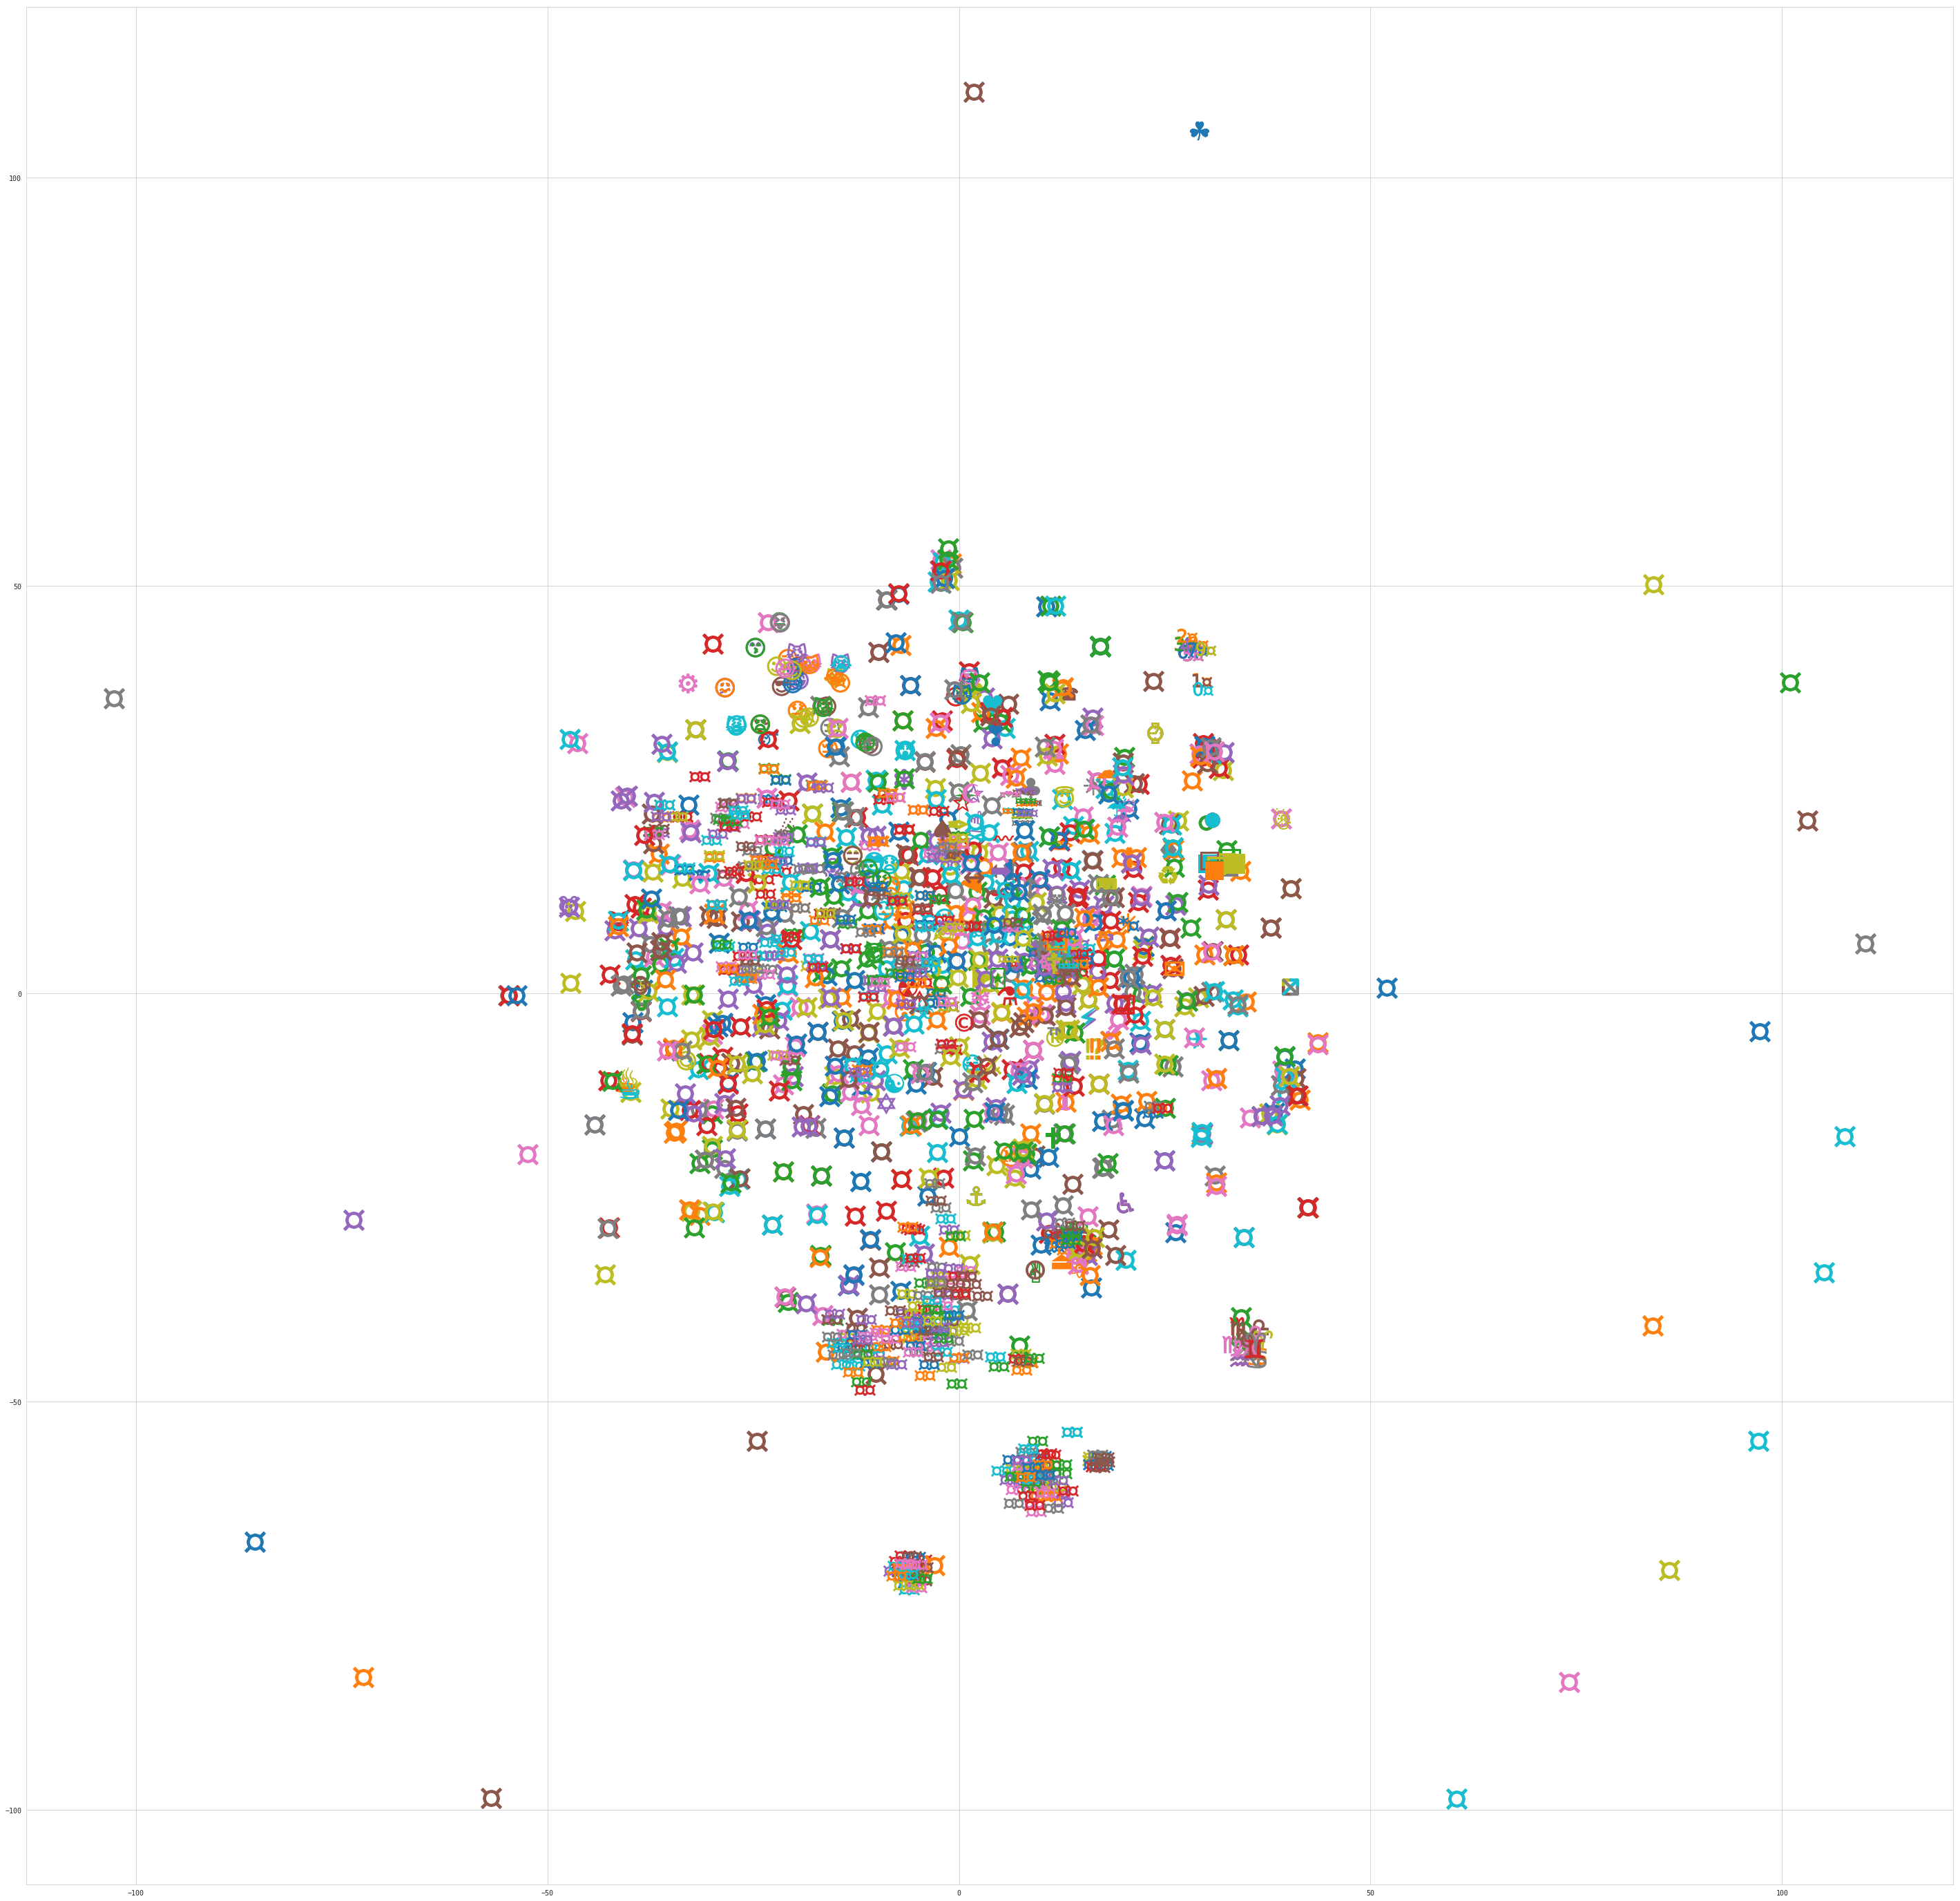

In [9]:
plt.figure(figsize=(50, 50))
for x_sample, emoji in zip(X_new, y):
#     plt.plot(x_sample[0], x_sample[1], marker=TextPath((0, 0), emoji), markersize=30)
    try:
        plt.plot(x_sample[0], x_sample[1], marker=fr'${emoji}$', markersize=30)
    except Exception as e:
        print(emoji, e)
plt.show()